In [1]:
from projection_fit import ProjectionFit
from matplotlib import pyplot as plt
import h5py
import numpy as np
import pprint
from image_processing import ImageProcessor
from gaussian_model import GaussianModel

In [2]:
def read_file(fname):
    with h5py.File(fname) as f:
        images = f["images"][:]
    return images

In [3]:
img_list= ['DYG14_1701969512.h5','DYG14_1701969514.h5','DYG14_1701969516.h5','DYG14_1701969518.h5',
           'DYG14_1701969528.h5','DYG14_1701969531.h5','DYG14_1701969533.h5','DYG14_1701969535.h5',
           'DYG14_1701969538.h5','DYG14_1701969541.h5','OTRS_LTUS_417_1692292260.h5','OTRS_IN20_621_1696886871.h5']
path = '/u/cd/cgarnier/beam_images/' + img_list[6]
print(img_list[6])
images = read_file(path)
raw_image = images[0,:,:]

DYG14_1701969533.h5


In [4]:
def get_projections(img):
    x_projection = np.array(np.sum(img,axis=0))
    y_projection = np.array(np.sum(img,axis=1))
    return x_projection, y_projection

In [5]:
x_proj, y_proj = get_projections(raw_image)

In [6]:
gauss_model = GaussianModel(x_proj)

In [7]:
gauss = GaussianModel()

In [8]:
projection_fit = ProjectionFit( model = gauss)

{'ampl': 146629.5561963635,
 'mean': 264.2474709814871,
 'sigma': 19.399864377301085,
 'offset': 106218.13836861639}

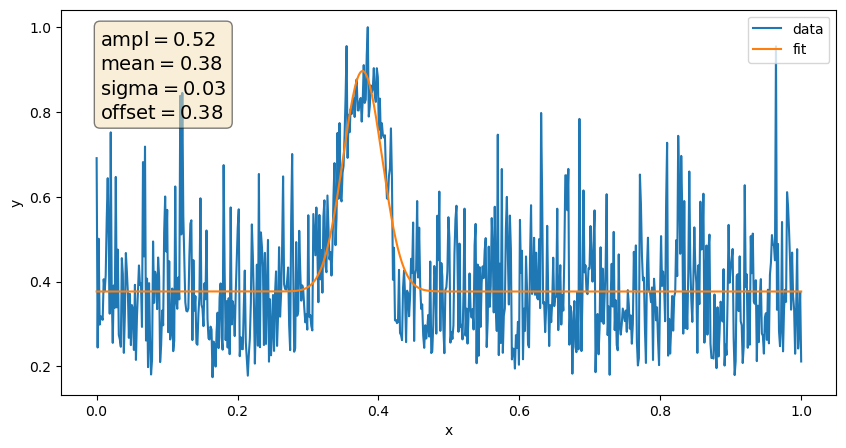

In [9]:
projection_fit.fit_projection(x_proj) #initialize()

{'ampl': 40764.31357821529,
 'mean': 428.7046960633264,
 'sigma': 105.73971568713043,
 'offset': 101055.4573354929}

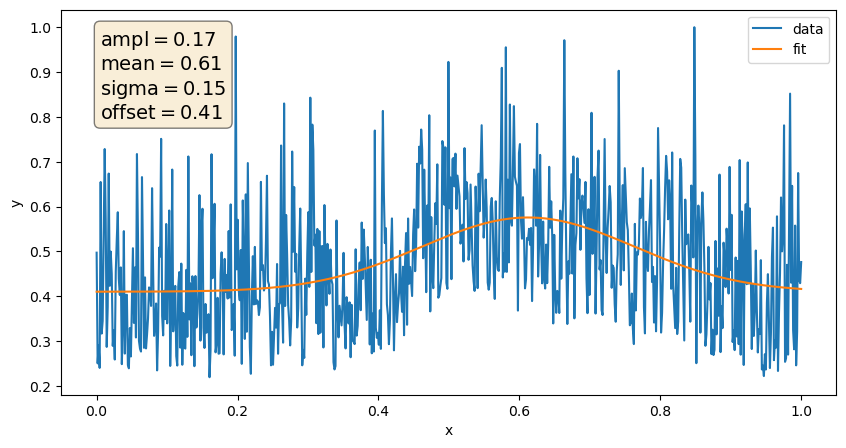

In [10]:
projection_fit.fit_projection(y_proj)